In [2]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
eye_class_names = ["closed", "open"]

train_path = "eye-data/train"
valid_path = "eye-data/valid"
test_path = "eye-data/test"

In [4]:
data_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

train_data = data_gen.flow_from_directory(directory=train_path, target_size=(100, 100), classes=eye_class_names, batch_size=5)
valid_data = data_gen.flow_from_directory(directory=valid_path, target_size=(100, 100), classes=eye_class_names, batch_size=5)
test_data = data_gen.flow_from_directory(directory=test_path, target_size=(100, 100), classes=eye_class_names, batch_size=5, shuffle=False)

Found 1234 images belonging to 2 classes.
Found 218 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


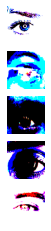

In [6]:
imgs, labels = next(train_data)
for i in range(5):
    plt.subplot(5, 1, i+1)
    plt.axis("off")
    plt.imshow(imgs[i], cmap=plt.cm.binary)
print(labels)

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(100, 100, 3)))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=32, activation='relu', kernel_regularizer='l2', bias_regularizer='l2'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=16, activation='relu', kernel_regularizer='l2', bias_regularizer='l2'))
model.add(layers.Dense(units=2, activation='softmax'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 40000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)               

In [14]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [15]:
history = model.fit(x=train_data, validation_data=valid_data, epochs=10, verbose=2)

Epoch 1/10
247/247 - 77s - loss: 2.8306 - accuracy: 0.7131 - val_loss: 0.9481 - val_accuracy: 0.9037
Epoch 2/10
247/247 - 68s - loss: 1.0578 - accuracy: 0.7998 - val_loss: 0.9980 - val_accuracy: 0.9037
Epoch 3/10
247/247 - 72s - loss: 1.0026 - accuracy: 0.8274 - val_loss: 0.8426 - val_accuracy: 0.9450
Epoch 4/10
247/247 - 69s - loss: 0.9633 - accuracy: 0.8395 - val_loss: 0.8190 - val_accuracy: 0.9128
Epoch 5/10
247/247 - 69s - loss: 0.9300 - accuracy: 0.8209 - val_loss: 0.7885 - val_accuracy: 0.9450
Epoch 6/10
247/247 - 69s - loss: 0.8670 - accuracy: 0.8517 - val_loss: 0.7302 - val_accuracy: 0.9450
Epoch 7/10
247/247 - 65s - loss: 0.8322 - accuracy: 0.8703 - val_loss: 0.6505 - val_accuracy: 0.9404
Epoch 8/10
247/247 - 66s - loss: 0.7937 - accuracy: 0.8606 - val_loss: 0.6595 - val_accuracy: 0.9587
Epoch 9/10
247/247 - 62s - loss: 0.7425 - accuracy: 0.8639 - val_loss: 0.5895 - val_accuracy: 0.9679
Epoch 10/10
247/247 - 65s - loss: 0.7151 - accuracy: 0.8598 - val_loss: 0.5709 - val_accura

In [16]:
predictions = model.predict(x=test_data, verbose=0)
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [17]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy)) # Get number of epochs

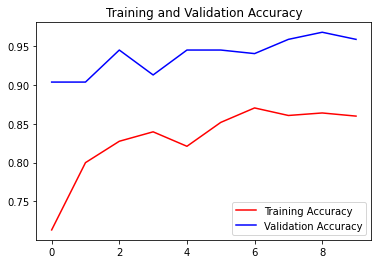

In [18]:
# Plot training and validation accuracy per epoch
plt.plot(epochs, accuracy, 'r', label="Training Accuracy")
plt.plot(epochs, val_accuracy, 'b', label="Validation Accuracy")
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

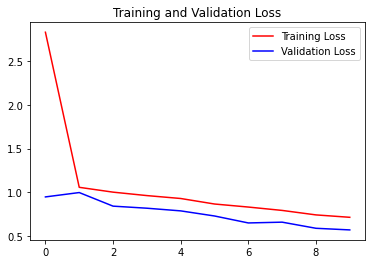

In [19]:
# Plot training and validation loss per epoch

plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [22]:
cm = confusion_matrix(y_true=test_data.classes, y_pred=np.argmax(predictions, axis=-1))

In [27]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.winter):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="red" if cm[i, j] > thresh else "white")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[77  3]
 [ 4 76]]


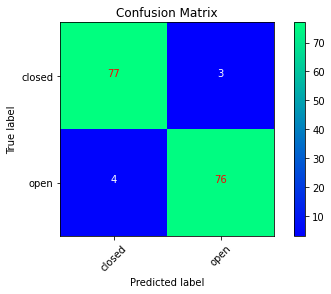

In [28]:
plot_confusion_matrix(cm=cm, classes=eye_class_names, title="Confusion Matrix")